# Hierarchical Agglomerative Clustering

Hierarchical clustering with the Ward linkage method is a technique used to group similar data points into clusters while preserving the hierarchical structure of the clusters. 

**Algorithm:**

    1.Initialization: Start with each data point as a singleton cluster.
    2.Merge Step: At each iteration, merge the two closest clusters based on a chosen distance metric.
    3.Stopping Criterion: Continue merging until a single cluster containing all data points is formed.

**Pros:**

    - Does not require specifying the number of clusters in advance.
    - Provides a hierarchical structure that can be useful for understanding relationships between clusters.
    - Can handle different shapes and sizes of clusters.

**Cons:**:

    - Computationally expensive, especially for large datasets.
    - Can be sensitive to noise and outliers.
    - Lack of flexibility in handling complex cluster shapes compared to other methods like K-means.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

sns.set_style('dark')

### Dataset

In [2]:
df = pd.read_csv("data/countries-lat-long.csv",encoding='unicode_escape')

In [3]:
df.count()

country      243
latitude     244
longitude    244
name         244
dtype: int64

In [4]:
df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [5]:
#sample a subset for ease of visualization
df = df.sample(50, random_state=2023)

In [6]:
data_scaled = normalize(df[['latitude','longitude']])
data_scaled = pd.DataFrame(data_scaled, columns=['latitude','longitude'])
data_scaled.head()

,latitude,longitude
0,0.041254,0.999149
1,0.277550,-0.960711
2,0.291073,0.956701
3,0.698459,0.715650
4,0.887053,0.461668


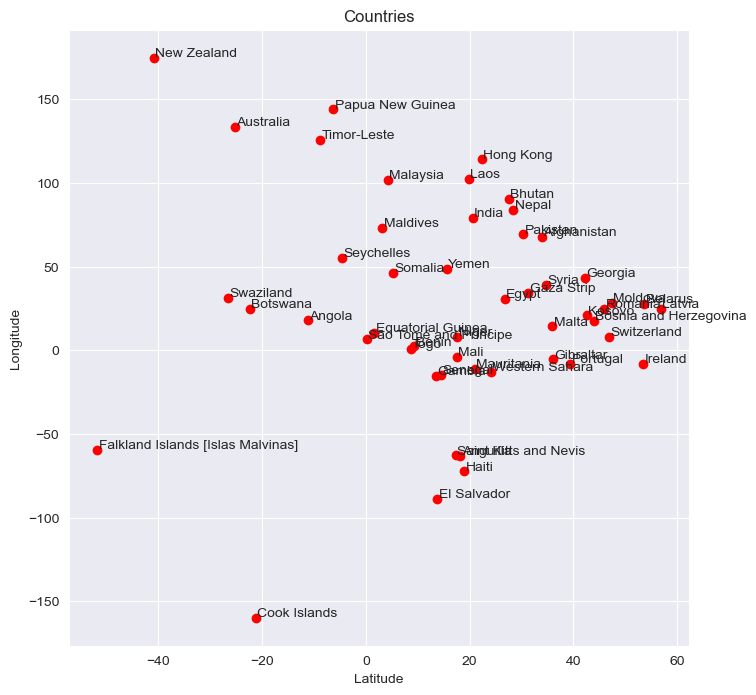

In [7]:
plt.figure(figsize=(8, 8))

plt.scatter(df['latitude'], df['longitude'], c='r')

# Create numbered labels for each point
labels = []
for index, row in df.iterrows():
    plt.annotate(str(row['name']), xy=(row['latitude'], row['longitude']), xytext=(1, 1), textcoords='offset points')
    labels.append(row['name'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Countries')
plt.locator_params(nbins=10)
plt.grid()

plt.show()

We will compare linkage functions for calculating the distance between clusters below:
single, average, weighted, centroid, median, and ward.  

In [8]:
lat_long= data_scaled.to_numpy()

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(lat_long, method='single', metric='euclidean')
Z2 = linkage(lat_long, method='complete', metric='euclidean')
Z3 = linkage(lat_long, method='average', metric='euclidean')
Z4 = linkage(lat_long, method='ward', metric='euclidean')

### Dendrogram

Notice that each distance method produces different linkages for the same data.

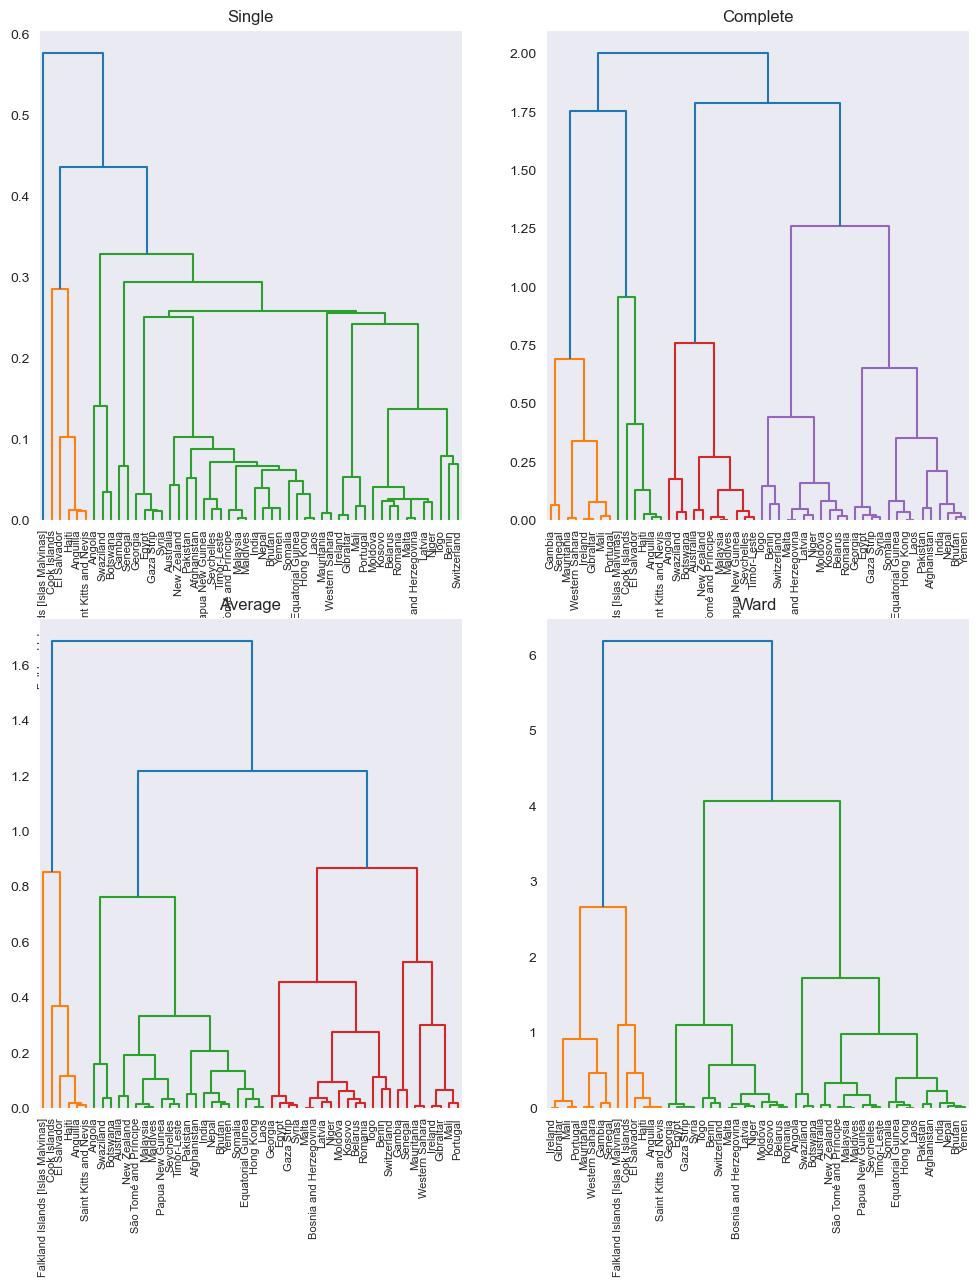

In [10]:
plt.figure(figsize=(12, 14))
plt.subplot(2,2,1), dendrogram(Z1,labels=labels), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2,labels=labels), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3,labels=labels), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4,labels=labels), plt.title('Ward')
plt.show()

### Create Clusters

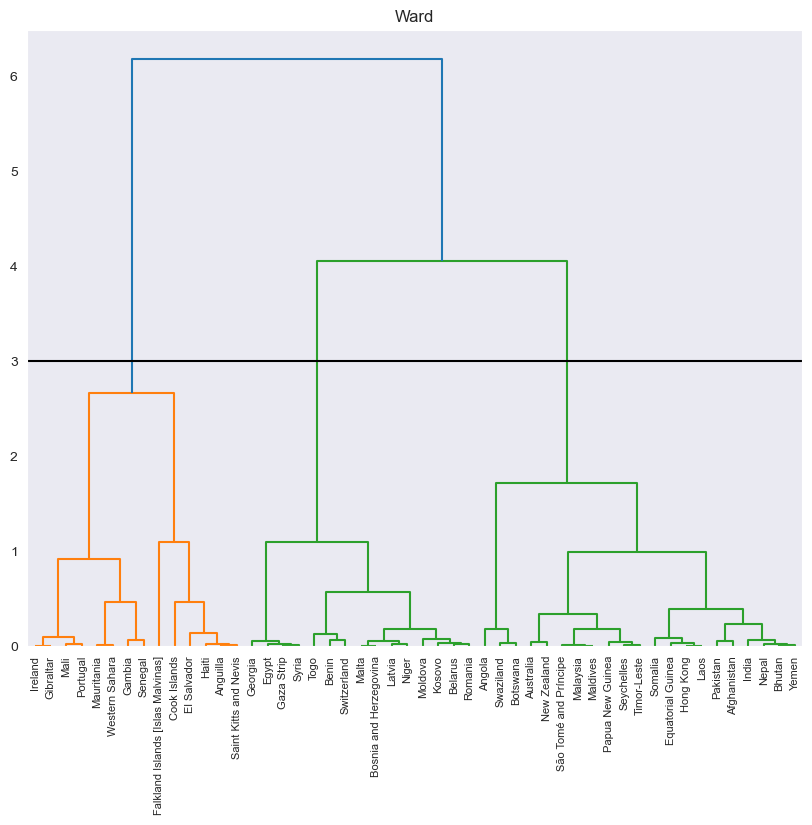

In [11]:
# Creating Dendrogram for our data
# max_d = cut-off/ Threshold value
max_d = 3

plt.figure(figsize=(10, 8))
dendrogram(Z4,labels=labels), plt.title('Ward')
  
# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')
plt.show()

### Flat Clustering

These functions cut hierarchical clusterings into flat clusterings or find the roots of the forest formed by a cut by providing the flat cluster ids of each observation.

In [12]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(Z4, 3, criterion='maxclust')

print(f"Clusters: {f1}")

Clusters: [3 1 3 2 2 2 3 2 2 2 3 2 1 2 1 3 2 1 3 3 1 3 3 1 1 1 3 2 2 2 1 1 3 3 3 1 1
 3 1 3 3 1 2 3 3 3 3 3 2 2]


### Sklearn Heirarchical Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

Z5 = AgglomerativeClustering(n_clusters=5, linkage='ward')

Z5.fit_predict(lat_long)

print(Z5.labels_)

[2 1 2 0 0 0 2 0 0 0 2 0 1 0 3 2 0 1 4 2 3 2 2 3 3 3 2 0 0 0 1 1 2 2 4 3 3
 2 1 2 2 3 0 2 4 2 2 2 0 0]


In [14]:
df['labels'] = Z5.labels_

In [15]:
df.head()

,country,latitude,longitude,name,labels
154,MY,4.210484,101.975766,Malaysia,2
4,AI,18.220554,-63.068615,Anguilla,1
30,BT,27.514162,90.433601,Bhutan,2
75,GE,42.315407,43.356892,Georgia,0
33,BY,53.709807,27.953389,Belarus,0


### Plot Clusters

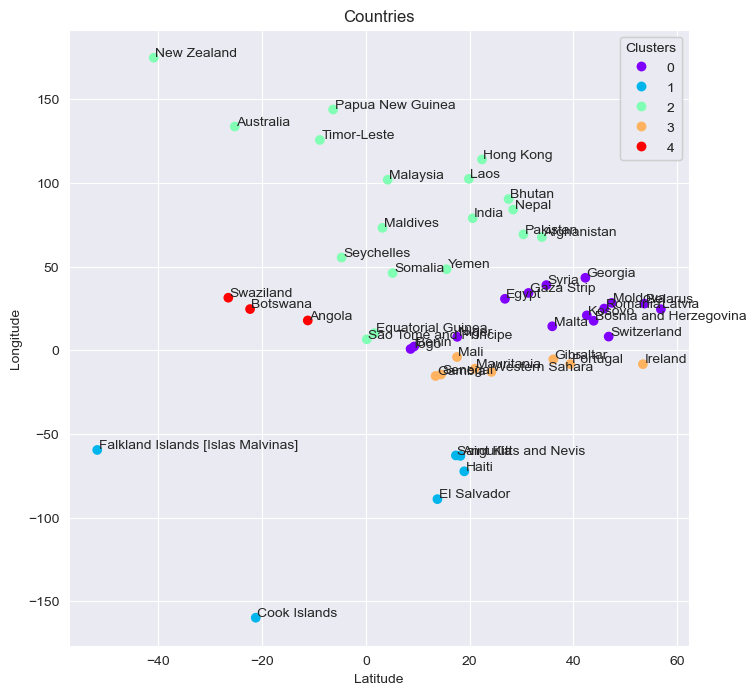

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

scatter = ax.scatter(df['latitude'], df['longitude'], c=Z5.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

for index, row in df.iterrows():
    plt.annotate(str(row['name']), xy=(row['latitude'], row['longitude']), xytext=(1, 1), textcoords='offset points')
    labels.append(row['name'])

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Countries')
plt.locator_params(nbins=10)
plt.grid()

plt.show()